In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
import rtree
from zlib import crc32
import hashlib
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
from shapely.geometry import Point
from haversine import Unit
from geopy.distance import distance

/Users/jnapolitano/venvs/finance/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
## Importing our DataFrames

gisfilepath = "/Users/jnapolitano/Projects/data/energy/non-active-wells.geojson"


wells_df = gpd.read_file(gisfilepath)

wells_df = wells_df.to_crs(epsg=3857)

In [3]:
wells_df.columns

Index(['index', 'OBJECTID', 'ID', 'NAME', 'STATE', 'TYPE', 'STATUS', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'WELLIDNO', 'API', 'PERMITNO', 'OPERATOR', 'OPERATORID',
       'PRODTYPE', 'COORDTYPE', 'SURF_LAT', 'SURF_LONG', 'BOT_LAT', 'BOT_LONG',
       'POSREL', 'FIELD', 'COMPDATE', 'TOTDEPTH', 'STAUTS_CAT', 'geometry'],
      dtype='object')

In [4]:
## Importing Pipeline Dataframe

gisfilepath = "/Users/jnapolitano/Projects/data/energy/Natural_Gas_Pipelines.geojson"


pipeline_df = gpd.read_file(gisfilepath)

pipeline_df = pipeline_df.to_crs(epsg=3857)

In [5]:
pipeline_df.drop(pipeline_df[pipeline_df['TYPEPIPE'] == 'Gathering'].index, inplace = True)

In [6]:
pipeline_df['PipeGeometry'] = pipeline_df['geometry'].copy()

In [7]:
pipeline_df.columns

Index(['FID', 'TYPEPIPE', 'Operator', 'Shape_Leng', 'Shape__Length',
       'geometry', 'PipeGeometry'],
      dtype='object')

In [8]:
nearest_wells_df= wells_df.sjoin_nearest(pipeline_df, how = 'left', distance_col="distance_euclidian")
nearest_wells_df.columns


Index(['index', 'OBJECTID', 'ID', 'NAME', 'STATE', 'TYPE', 'STATUS', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'WELLIDNO', 'API', 'PERMITNO', 'OPERATOR', 'OPERATORID',
       'PRODTYPE', 'COORDTYPE', 'SURF_LAT', 'SURF_LONG', 'BOT_LAT', 'BOT_LONG',
       'POSREL', 'FIELD', 'COMPDATE', 'TOTDEPTH', 'STAUTS_CAT', 'geometry',
       'index_right', 'FID', 'TYPEPIPE', 'Operator', 'Shape_Leng',
       'Shape__Length', 'PipeGeometry', 'distance_euclidian'],
      dtype='object')

In [9]:
nearest_wells_df

,index,OBJECTID,ID,NAME,STATE,TYPE,STATUS,COUNTY,COUNTYFIPS,COUNTRY,...,STAUTS_CAT,geometry,index_right,FID,TYPEPIPE,Operator,Shape_Leng,Shape__Length,PipeGeometry,distance_euclidian
0,720167,720168,W560039024,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,JOHNSON,56019,USA,...,1,POINT (-11831144.797 5549191.441),30227,30228,Interstate,Bison Pipeline,1.278462,173030.322980,"LINESTRING (-11790336.630 5494422.424, -117865...",44625.275370
1,708507,708508,W560027364,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,CARBON,56007,USA,...,1,POINT (-11976297.510 5042534.715),31358,31359,Interstate,Questar Pipeline Co.,0.268145,30447.011086,"LINESTRING (-11984506.320 5012658.646, -119851...",30816.842943
2,715428,715429,W560034285,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,FREMONT,56013,USA,...,1,POINT (-12044048.444 5207896.951),27131,27132,Interstate,Southern Star Central Gas PL Co.,0.076245,9557.779719,"LINESTRING (-12038734.497 5151818.779, -120317...",50999.469183
3,708591,708592,W560027448,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,CARBON,56007,USA,...,1,POINT (-11992810.532 5106126.430),27138,27139,Interstate,Southern Star Central Gas PL Co.,0.114048,12695.765286,"LINESTRING (-11980997.975 5107748.211, -119936...",1621.781149
4,715495,715496,W560034352,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,NON-ACTIVE WELL,FREMONT,56013,USA,...,1,POINT (-12008860.576 5221474.537),30360,30361,Interstate,Tallgrass Interstate Gas Transmission,0.141284,17069.395563,"LINESTRING (-12038891.235 5265881.681, -120248...",53608.161741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160441,681337,681338,W560000194,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL,HOT SPRINGS,56017,USA,...,4,POINT (-12088044.133 5432638.661),27457,27458,Interstate,Williston Basin Interstate PL Co.,0.122880,13678.939029,"LINESTRING (-12027891.088 5426896.907, -120415...",46827.452302
160442,681764,681765,W560000621,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL,NATRONA,56025,USA,...,4,POINT (-11835017.602 5370182.897),13162,13163,Interstate,MIGC Pipeline System,0.336895,38635.742298,"LINESTRING (-11751892.222 5349172.198, -117585...",55995.518283
160443,681344,681345,W560000201,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL,HOT SPRINGS,56017,USA,...,4,POINT (-12094765.493 5453280.825),3383,3384,Interstate,Colorado Interstate Gas Co.,0.417645,59503.770559,"LINESTRING (-12026665.683 5436962.405, -120527...",54038.158553
160444,681331,681332,W560000188,NOT AVAILABLE,WY,OIL & NATURAL GAS WELL,STORAGE WELL/MAINTENANCE WELL/OBSERVATION WELL,HOT SPRINGS,56017,USA,...,4,POINT (-12083043.216 5431486.077),27457,27458,Interstate,Williston Basin Interstate PL Co.,0.122880,13678.939029,"LINESTRING (-12027891.088 5426896.907, -120415...",41726.321721


In [10]:
nearest_wells_df['distance_km'] = nearest_wells_df.distance_euclidian.apply(lambda x: x / 1000)

In [11]:
filtered_wells = nearest_wells_df.loc[nearest_wells_df['distance_km'] < 2].copy()

In [12]:
filtered_wells.describe()

,index,OBJECTID,LATITUDE,LONGITUDE,PERMITNO,OPERATORID,SURF_LAT,SURF_LONG,BOT_LAT,BOT_LONG,TOTDEPTH,STAUTS_CAT,index_right,FID,Shape_Leng,Shape__Length,distance_euclidian,distance_km
count,5.891600e+04,5.891600e+04,58916.000000,58916.000000,5.891600e+04,5.891600e+04,58916.000000,58916.000000,58909.000000,58916.000000,58916.000000,58916.000000,58916.000000,58916.000000,58916.000000,58916.000000,5.891600e+04,5.891600e+04
mean,2.876220e+05,2.876230e+05,35.675314,-88.211450,2.065160e+06,4.079539e+07,-27.605657,-143.441562,-949.945779,-956.106183,-593.200370,1.297423,13100.924299,13101.924299,0.400372,32272.035793,8.929434e+02,8.929434e-01
std,2.748624e+05,2.748624e+05,4.333618,7.353183,3.172222e+06,2.010973e+08,247.667329,218.214976,219.595052,192.030681,1681.248786,0.896562,10088.240669,10088.240669,11.655711,46825.746281,5.765039e+02,5.765039e-01
min,0.000000e+00,1.000000e+00,26.047093,-112.512950,-9.990000e+02,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.000000,40.000000,41.000000,0.000171,19.334435,1.303852e-08,1.303852e-11
25%,7.534850e+04,7.534950e+04,31.968007,-93.497915,-9.990000e+02,-9.990000e+02,30.274497,-93.594670,-999.000000,-999.000000,-999.000000,1.000000,4044.000000,4045.000000,0.079792,10390.421353,3.809142e+02,3.809142e-01
50%,3.010045e+05,3.010055e+05,37.754454,-89.423060,-9.990000e+02,-9.990000e+02,33.945500,-89.776840,-999.000000,-999.000000,-999.000000,1.000000,8744.000000,8745.000000,0.155083,19537.126396,8.395529e+02,8.395529e-01
75%,3.368862e+05,3.368872e+05,39.104642,-80.997557,3.502876e+06,-9.990000e+02,39.092723,-80.998595,-999.000000,-999.000000,-999.000000,1.000000,23176.000000,23177.000000,0.291804,35669.491995,1.374844e+03,1.374844e+00
max,1.505594e+06,1.505595e+06,48.991730,-76.216780,2.012020e+07,1.044755e+09,48.991730,-76.216780,45.158000,-79.282180,21475.000000,4.000000,33798.000000,33799.000000,1000.000000,704127.420619,1.999965e+03,1.999965e+00


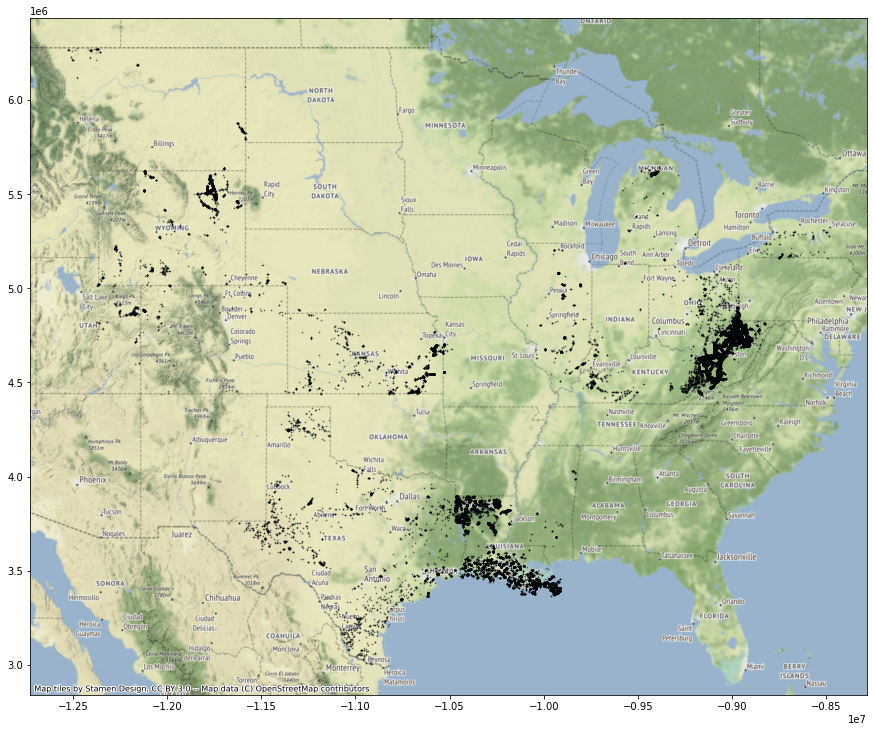

In [13]:
well_map_ax = filtered_wells.plot(figsize=(15, 15), alpha=0.5, edgecolor='k', markersize = .5)
cx.add_basemap(well_map_ax, zoom=6)
#filtered_wells.plot()

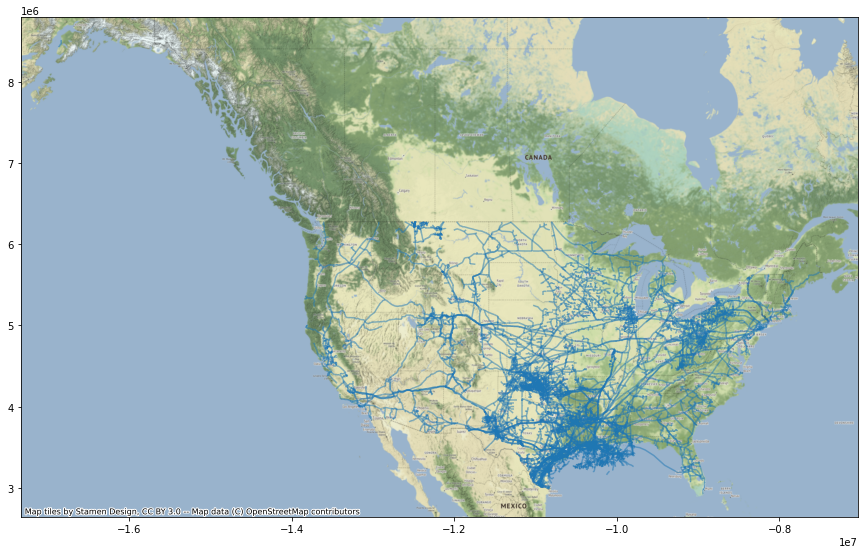

In [14]:
pipeline_map = pipeline_df.plot(figsize = (15,15), alpha=0.5,)
cx.add_basemap(pipeline_map, zoom=6)

In [15]:
combined_map = wells_df.plot(ax = pipeline_map, alpha=0.5, figsize = (20,20), edgecolor='k', markersize = .5)

#cx.add_basemap(well_map, zoom=6)
#plt.show()

<Figure size 432x288 with 0 Axes>

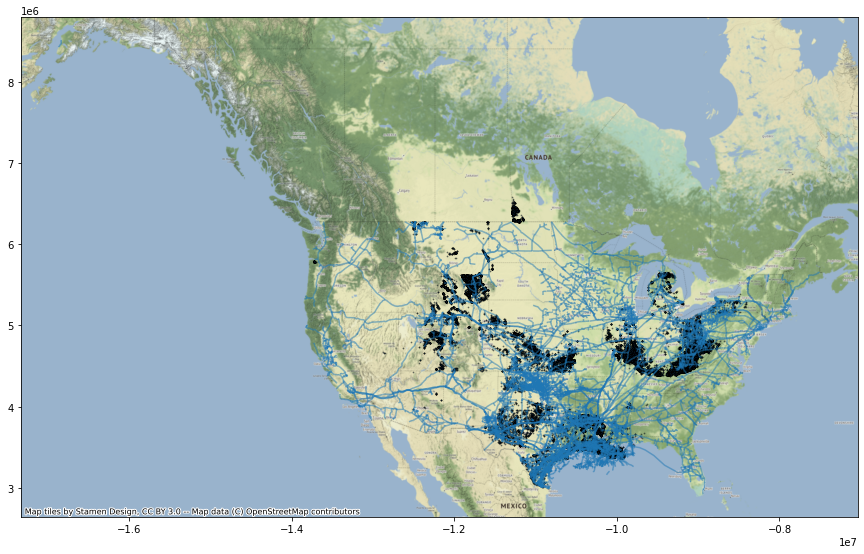

In [16]:
combined_map.figure